In [23]:
import numpy as np
import pandas as pd

In [24]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [25]:
df=pd.read_csv("House.csv")

In [26]:
print(len(df.columns))

23


In [27]:
print(len(df))

14620


In [28]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [29]:

from sklearn.model_selection import train_test_split

In [30]:
features = ['number of bedrooms','number of bathrooms','lot area','grade of the house','condition of the house','number of views', 'waterfront present']

In [31]:
X = df[features]
y = np.log1p(df['Price'])

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
y_pred_log = reg.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

In [40]:
import joblib

bias = (np.expm1(y_test) - y_pred).mean()
print("Bias value:", bias)  
joblib.dump(scaler, "scaler.pkl")
joblib.dump(reg, "linear_model.pkl")
joblib.dump(bias, "bias.pkl")


Bias value: 29987.080948071587


['bias.pkl']

In [42]:

print(reg.coef_)
print(reg.intercept_)


[0.02940596 0.07082842 0.00378818 0.30776205 0.07450084 0.07195465
 0.03255281]
13.048895458197082


In [43]:
from sklearn.metrics import  r2_score

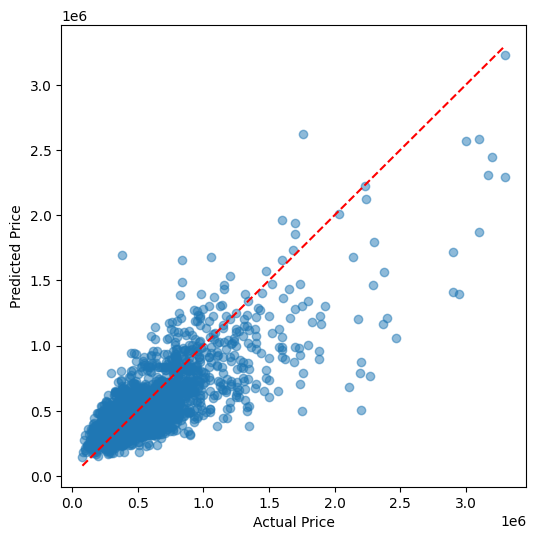

In [45]:


y_log = reg.predict(X_test_scaled)                 
y_log = np.clip(y_log, -20, 20)                    
y_pred = np.expm1(y_log)                          
y_true = np.expm1(y_test)

plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.5); mn, mx = min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())
plt.plot([mn,mx],[mn,mx],'r--'); plt.xlabel("Actual Price"); plt.ylabel("Predicted Price"); plt.show()


In [47]:
train_score = reg.score(X_train_scaled, y_train)
test_score  = reg.score(X_test_scaled,  y_test)

print("Train R² Score:", train_score)
print("Test R² Score:", test_score)


Train R² Score: 0.5799476826093486
Test R² Score: 0.5671369923816759


In [48]:
print("Linear → R2:", reg.score(X_test_scaled, y_test),
      " RMSE:", np.sqrt(mean_squared_error(y_test, reg.predict(X_test_scaled))))

Linear → R2: 0.5671369923816759  RMSE: 0.34893631477011544


REGULARIZATION

In [62]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_r2 = ridge.score(X_test_scaled, y_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_scaled))
print("Ridge -> R²:", ridge_r2, "RMSE:", ridge_rmse)

Ridge -> R²: 0.5671345680804145 RMSE: 0.3489372918986165


['ridge_model.pkl']

In [63]:
lasso = Lasso(alpha=0.5, max_iter=5000, tol=1e-2)
lasso.fit(X_train_scaled, y_train)
lasso_r2 = lasso.score(X_test_scaled, y_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled)))
print("Lasso -> R²:", lasso_r2, "RMSE:", lasso_rmse)

Lasso -> R²: -0.0006801159721401273 RMSE: 0.5305405323126062


['lasso_model.pkl']

In [64]:
y_pred_log = reg.predict(X_test_scaled)        
y_pred_log = np.clip(y_pred_log, -20, 20)

y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

from sklearn.metrics import r2_score, mean_squared_error
dt_r2_real = r2_score(y_true, y_pred)
dt_rmse_real = np.sqrt(mean_squared_error(y_true, y_pred))
print("Linear Regression (real scale) -> R²:", dt_r2_real, "RMSE:", dt_rmse_real)
#both linear and ridge show idnetical resullt which tells data isnt heavilt multicollinear

Linear Regression (real scale) -> R²: 0.6174635646095135 RMSE: 213863.52749251475


In [65]:
import joblib

In [66]:
scaler = joblib.load("scaler.pkl")
lasso = joblib.load("lasso_model.pkl")

In [73]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import joblib
import pandas as pd
import numpy as np

pipe=Pipeline([
    ("scaler",StandardScaler()),
    ("model",LinearRegression())
])

pipe.fit(X_train, y_train)        


joblib.dump(pipe, "rent_pipe.pkl")

def predict_rent(bedrooms, bathrooms, lot_area, grade, condition, waterfront, views):
   
    row = {
        'number of bedrooms': bedrooms,
        'number of bathrooms': bathrooms,
        'lot area': lot_area,
        'grade of the house': grade,
        'condition of the house': condition,
        'waterfront present': waterfront,
        'number of views': views
    }
    newX = pd.DataFrame([row])[X.columns]
    y_log = pipe.predict(newX)[0]      
    return np.expm1(y_log)                  

rent = predict_rent(2,4, 5998, 5, 5, 2, 3)
print("\nPredicted Rent per Month:", rent)







Predicted Rent per Month: 839937.7505904507
